In [29]:
### Level 3 – Task 1: Restaurant Rating Prediction

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("Dataset .csv")

In [11]:
df = df[['Votes', 'Price range', 'Has Online delivery', 'Has Table booking', 'Aggregate rating']]
df = df.dropna(subset = ['Aggregate rating'])
df['Votes'] = df['Votes'].fillna(0)
df['Price range'] = df['Price range'].fillna(df['Price range'].median())
df['Has Online delivery'] = df['Has Online delivery'].fillna("No")
df['Has Table booking'] = df['Has Table booking'].fillna("No")

In [17]:
le_delivery = LabelEncoder()
le_booking = LabelEncoder()

df['Has Online delivery'] = le_delivery.fit_transform(df['Has Online delivery'])
df['Has Table booking'] = le_delivery.fit_transform(df['Has Table booking'])

In [19]:
X = df.drop("Aggregate rating", axis=1)
y = df["Aggregate rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [25]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae, 3))
print("R² Score:", round(r2, 3))

Mean Absolute Error (MAE): 1.075
R² Score: 0.263


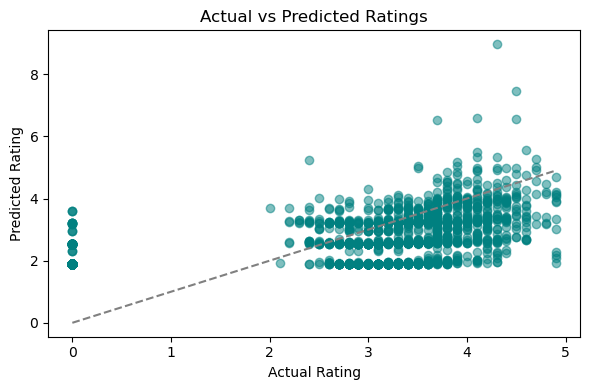

In [27]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='gray')
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Ratings")
plt.tight_layout()
plt.savefig("Level_3_Task1_PredictionPlot.png")  # Save chart
plt.show()
